[IPython Notebook](minimal_contact_binary.ipynb) |  [Python Script](minimal_contact_binary.py)

Minimal Contact Binary System
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [58]:
%matplotlib inline

In [59]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

Here we'll initialize a default binary, but ask for it to be created as an overcontact

In [60]:
b_cb = phoebe.default_binary(contact_binary=True)

We'll compare this to the default detached binary

In [61]:
b_detached = phoebe.default_binary()

Hierarchy
-------------

Let's first look at the hierarchy of the default detached binary, and then compare that to the hierarchy of the overcontact system

In [62]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



In [63]:
print b_cb.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:contact_envelope
    



As you can see, the overcontact system has an additional "component" with method "envelope" and component label "contact_envelope".

Next let's look at the parameters in this envelope component

In [64]:
print b_cb.filter(component='contact_envelope', kind='envelope', context='component')

ParameterSet: 9 parameters
  abun@contact_envelope@compo...: 0.0
  pot@contact_envelope@component: 3.5
  intens_coeff1@contact_envel...: 1.0
  intens_coeff2@contact_envel...: 1.0
  intens_coeff3@contact_envel...: 1.0
  intens_coeff4@contact_envel...: 1.0
  intens_coeff5@contact_envel...: 1.0
  ld_func_bol@contact_envelop...: logarithmic
  ld_coeffs_bol@contact_envel...: [ 0.5  0.5]


In [65]:
b_cb['pot@contact_envelope'] = 3.5

In [66]:
b_cb['pot@contact_envelope']

<Parameter: pot=3.5 | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, timederiv>

The individual stars are still there, but since the surface is being defined by the contact envelope, most of the parameters are no longer relevant.

In [67]:
print b_cb.filter(component='primary', kind='star', context='component')

ParameterSet: 8 parameters
          teff@primary@component: 10000.0 K
     gravb_bol@primary@component: 1.0
  frac_refl_bol@primary@compo...: 0.6
* frac_lost_bol@primary@compo...: 0.4
   ld_func_bol@primary@component: logarithmic
  ld_coeffs_bol@primary@compo...: [ 0.5  0.5]
*         mass@primary@component: 0.381666540188 solMass
*          sma@primary@component: 4.0 solRad


Now, of course, if we didn't originally know we wanted a contact binary and built the default detached system, we could still turn it into an contact binary just by changing the hierarchy.

In [68]:
b_detached.add_component('envelope', component='contact_envelope')

<ParameterSet: 9 parameters | qualifiers: abun, pot, ld_func_bol, ld_coeffs_bol, intens_coeff1, intens_coeff2, intens_coeff3, intens_coeff4, intens_coeff5>

In [69]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'], b_detached['contact_envelope'])
print hier

orbit:binary(star:primary, star:secondary, envelope:contact_envelope)


In [70]:
b_detached.set_hierarchy(hier)

In [71]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary 
        envelope:contact_envelope
    



Likewise, we can make a contact system detached again simply by removing the envelope from the hierarchy.  The parameters themselves will still exist (unless you remove them), so you can always just change the hierarchy again to change back to an overcontact system.

In [72]:
hier = phoebe.hierarchy.binaryorbit(b_detached['binary'], b_detached['primary'], b_detached['secondary'])
print hier

orbit:binary(star:primary, star:secondary)


In [73]:
b_detached.set_hierarchy(hier)

In [74]:
print b_detached.hierarchy


    orbit:binary 
    
        star:primary 
        star:secondary
    



Adding Datasets
---------------------

In [75]:
b_cb.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 1 parameters>

In [76]:
b_cb.add_dataset('orb', times=np.linspace(0,3,201), dataset='orb01')

<ParameterSet: 2 parameters | components: primary, secondary>

In [77]:
b_cb.add_dataset('lc', times=np.linspace(0,3,21), dataset='lc01')

<ParameterSet: 13 parameters | kinds: lc, lc_dep>

In [78]:
b_cb.add_dataset('rv', times=np.linspace(0,3,21), dataset='rv01')

<ParameterSet: 11 parameters | kinds: rv, rv_dep>

For comparison, we'll do the same to our detached system

In [79]:
b_detached.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 1 parameters>

In [80]:
b_detached.add_dataset('orb', times=np.linspace(0,3,201), dataset='orb01')

<ParameterSet: 2 parameters | components: primary, secondary>

In [81]:
b_detached.add_dataset('lc', times=np.linspace(0,3,21), dataset='lc01')

<ParameterSet: 13 parameters | kinds: lc, lc_dep>

In [82]:
b_detached.add_dataset('rv', times=np.linspace(0,3,21), dataset='rv01')

<ParameterSet: 11 parameters | kinds: rv, rv_dep>

Running Compute
--------------------

In [83]:
b_cb.run_compute(reflection_method='none')

<ParameterSet: 64 parameters | kinds: rv, mesh, orb, lc>

In [84]:
b_detached.run_compute(reflection_method='none')

<ParameterSet: 108 parameters | kinds: rv, mesh, orb, lc>

Synthetics
------------------

The synthetic meshes for our overcontact system are attached to the envelope component, whereas the detached system are attached to the two star components

In [85]:
print b_cb['mesh01@model'].components

['contact_envelope']


In [86]:
print b_detached['mesh01@model'].components

['primary', 'secondary']


But dynamical quantities are still attached for each star component - regardless of whether they're in a detached or overcontact system

In [87]:
print b_cb['orb01@model'].components

['primary', 'secondary']


In [88]:
print b_detached['orb01@model'].components

['primary', 'secondary']


Plotting
---------------

### Meshes

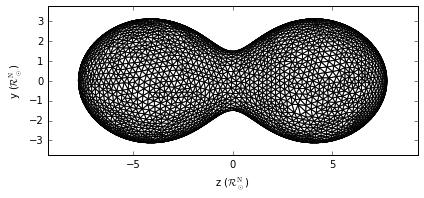

In [89]:
axs, artists = b_cb['mesh01@model'].plot(x='zs')

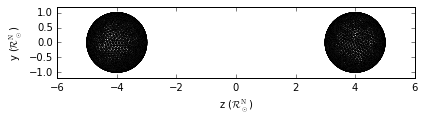

In [90]:
axs, artists = b_detached['mesh01@model'].plot(x='zs')

### Orbits

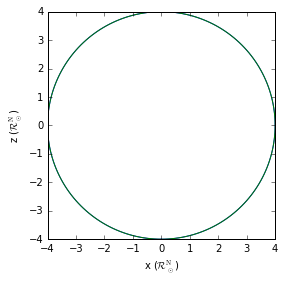

In [91]:
axs, artists = b_cb['orb01@model'].plot()

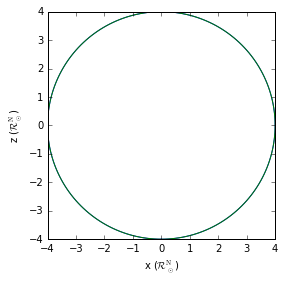

In [92]:
axs, artists = b_detached['orb01@model'].plot()

### Light Curves

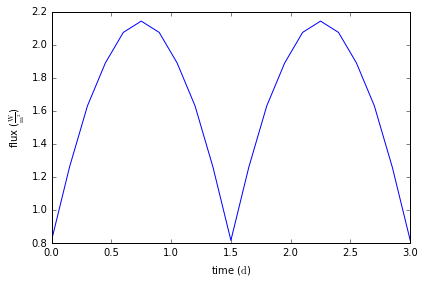

In [93]:
axs, artists = b_cb['lc01@model'].plot()

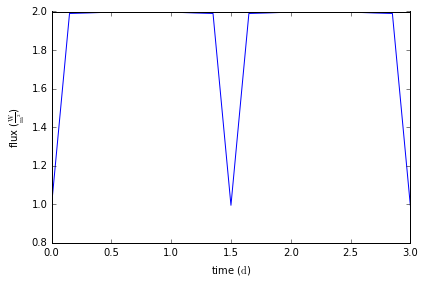

In [94]:
axs, artists = b_detached['lc01@model'].plot()

### RVs

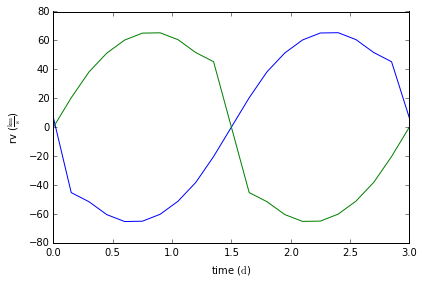

In [95]:
axs, artists = b_cb['rv01@model'].plot()

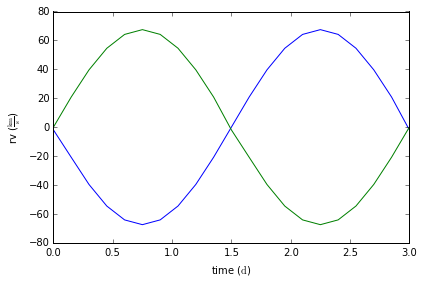

In [96]:
axs, artists = b_detached['rv01@model'].plot()